First, lets import the pandas and the pyplot for matplotlib. Then, the data set. It is a csv so we can just use pd.read_csv to read it in.Then, we will then make a dictionary for the data set. This will help us later as we go to read in the data. 

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

dataBridges = pd.read_csv('https://data.wprdc.org/datastore/dump/23f675e5-f745-49c1-8fa0-c5bc35c25184')

# make dictionary
dataBridges_dict = dict()

Next lets go through the dataframe for bridges and make a new item whenever it is a new neighborhood, and if the neighborhood is already in the dictionary (AKA a repeat neighborhood), we will just add one to the total of the item. This takes something that looks like this:

* East Hills 1
* Central Oakland 1
* Homewood South 1
* Central Oakland 1
* Troy Hill 1
* Central Oakland 1

and turns it into

* East Hills 1
* Homewood South 1
* Troy Hill 1
* Central Oakland 3

The data is now easier to understand and chart.

In [13]:
# iterate through the dataframe
for i in range(len(dataBridges)):
    # get the item name and quantity
    item = dataBridges.loc[i, 'start_neighborhood']
    
    if item in dataBridges_dict: # if it's in the dict
        dataBridges_dict[item] += 1 # add the quantity to it
    else:
        dataBridges_dict[item] = 1 # otherwise, set it to the quantity

Then we will convert the dictionary back into a series.

In [14]:
dataBridges_series = pd.Series(dataBridges_dict, name = "Bridges")

And display the values sorted for least to greatest.

In [15]:
dataBridges_series.sort_values()[:]

Lower Lawrenceville           2
Manchester                    2
Northview Heights             2
Summer Hill                   2
Allentown                     2
Banksville                    2
Beechview                     2
Point Breeze North            2
Swisshelm Park                2
East Liberty                  2
Central Northside             2
Allegheny West                2
Fineview                      2
Regent Square                 2
Squirrel Hill North           2
North Oakland                 2
Spring Hill-City View         2
Esplen                        2
Strip District                2
Perry South                   2
Bluff                         4
Lincoln-Lemington-Belmar      4
Windgap                       4
Elliott                       4
Sheraden                      4
Brighton Heights              4
Highland Park                 4
South Shore                   4
Arlington                     4
Marshall-Shadeland            4
Brookline                     4
Mount Wa

In [16]:
dataBridges_series.sort_values(ascending=False)[:10]

Squirrel Hill South          32
South Side Flats             16
Troy Hill                    16
Central Business District    14
Shadyside                    14
Hays                         10
Hazelwood                    10
Oakwood                      10
Overbrook                     8
West End                      8
Name: Bridges, dtype: int64

got the data, now i need a graph!

Text(0, 0.5, 'Total amount of bridges')

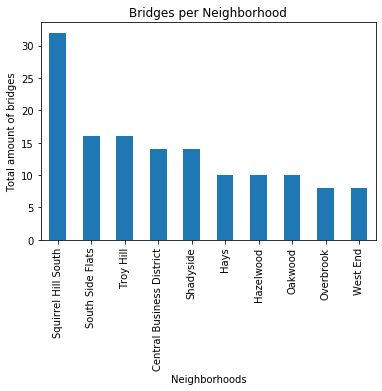

In [20]:
dataBridges_series.sort_values(ascending=False)[:10].plot.bar()
plt.title('Bridges per Neighborhood')
plt.xlabel('Neighborhoods')
plt.ylabel('Total amount of bridges')